In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import sqlite3
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import sys
import datetime, os
from sklearn import metrics
from sklearn import preprocessing
from sklearn.utils import shuffle
from time import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.keras.models import load_model


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm

from sklearn.preprocessing import StandardScaler



from sklearn.model_selection import GridSearchCV

# Importer la grande base

In [2]:
con=sqlite3.connect('Table-2.db')
raw_data=pd.read_sql_query("SELECT * FROM A",con)
data = raw_data.copy()
print(data.tail())
print(type(data))

                   P1            P2            P3            P4            P5  \
3991999  1.044813e-24  1.365423e-24  1.783170e-24  1.044813e-24  1.580897e-24   
3992000  1.073063e-24  9.264329e-25  7.989262e-25  1.401159e-24  1.210625e-24   
3992001  1.828304e-24  1.401159e-24  1.073063e-24  1.580897e-24  1.210625e-24   
3992002  1.365423e-24  1.580897e-24  1.828304e-24  1.044813e-24  1.210625e-24   
3992003  7.989262e-25  1.044813e-24  1.365423e-24  7.989262e-25  1.210625e-24   

                   P6            P7            P8            P9            F1  \
3991999  2.384010e-24  1.401159e-24  1.401159e-24  2.384010e-24  1.127537e-27   
3992000  1.044813e-24  1.828304e-24  1.580897e-24  1.365423e-24  5.199348e-28   
3992001  7.989262e-25  1.365423e-24  1.044813e-24  7.989262e-25  1.000165e-27   
3992002  1.073063e-24  7.989262e-25  7.989262e-25  1.073063e-24  6.791624e-28   
3992003  1.828304e-24  1.073063e-24  1.073063e-24  1.828304e-24  8.637148e-28   

         ...            F3

# Scaler la grande base

In [3]:
x=data.values
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
data_scaled = pd.DataFrame(x_scaled)
data_scaled.columns = ['P1','P2','P3','P4','P5','P6','P7','P8','P9','F1','F2','F3','F4','A1','B1','A2','B2','A3','B3','A4','B4']
data_scaled

,P1,P2,P3,P4,P5,P6,P7,P8,P9,F1,...,F3,F4,A1,B1,A2,B2,A3,B3,A4,B4
0,-0.540951,-0.540950,-0.540949,-0.541029,-0.540950,-0.540812,-0.540951,-0.540892,-0.540949,-0.468064,...,-0.468085,-0.468064,0.001660,1.414077,0.000841,1.413754,0.001984,1.414672,0.001166,1.414348
1,-0.540951,-0.540951,-0.540951,-0.541029,-0.540950,-0.540812,-0.540949,-0.540891,-0.540949,-0.468085,...,-0.468064,-0.468085,1.413754,-0.000841,1.414348,-0.001166,1.414077,-0.001660,1.414672,-0.001984
2,-0.540949,-0.540950,-0.540951,-0.541028,-0.540950,-0.540813,-0.540949,-0.540891,-0.540951,-0.468064,...,-0.468085,-0.468064,-0.001166,-1.414348,-0.001984,-1.414672,-0.000841,-1.413754,-0.001660,-1.414077
3,-0.540949,-0.540949,-0.540949,-0.541028,-0.540950,-0.540813,-0.540951,-0.540892,-0.540951,-0.468085,...,-0.468064,-0.468085,-1.414672,0.001984,-1.414077,0.001660,-1.414348,0.001166,-1.413754,0.000841
4,-0.540951,-0.540950,-0.540949,-0.541029,-0.540950,-0.540812,-0.540951,-0.540892,-0.540949,-0.468064,...,-0.468085,-0.468064,0.001660,1.414077,0.002254,1.413753,0.003397,1.414669,0.001166,1.414348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991999,-0.540963,-0.540963,-0.540963,-0.541042,-0.540963,-0.540826,-0.540963,-0.540905,-0.540963,-0.468085,...,-0.468085,-0.468085,-0.767532,1.187973,-0.765750,1.188414,-0.767208,1.188567,-0.767800,1.187476
3992000,-0.540963,-0.540963,-0.540963,-0.541042,-0.540963,-0.540826,-0.540963,-0.540905,-0.540963,-0.468085,...,-0.468085,-0.468085,1.188414,0.765750,1.188243,0.766613,1.188738,0.766345,1.188567,0.767208
3992001,-0.540963,-0.540963,-0.540963,-0.541042,-0.540963,-0.540826,-0.540963,-0.540905,-0.540963,-0.468085,...,-0.468085,-0.468085,0.766613,-1.188243,0.767208,-1.188567,0.765750,-1.188414,0.766345,-1.188738
3992002,-0.540963,-0.540963,-0.540963,-0.541042,-0.540963,-0.540826,-0.540963,-0.540905,-0.540963,-0.468085,...,-0.468085,-0.468085,-1.188567,-0.767208,-1.188738,-0.766345,-1.188243,-0.766613,-1.188414,-0.765750


# Shuffle (améliore la généralisation)

In [36]:
data_scaled=data_scaled.sample(frac = 1)
data_scaled

,P1,P2,P3,P4,P5,P6,P7,P8,P9,F1,...,F3,F4,A1,B1,A2,B2,A3,B3,A4,B4
2640450,-0.540959,-0.540959,-0.540959,-0.541038,-0.540959,-0.540822,-0.540959,-0.540901,-0.540959,-0.468080,...,-0.468081,-0.468080,-0.867359,-1.117491,-0.987114,-1.013050,-0.986372,-1.013117,-0.867556,-1.116355
1853279,-0.540963,-0.540963,-0.540963,-0.541042,-0.540963,-0.540826,-0.540963,-0.540905,-0.540963,-0.468085,...,-0.468085,-0.468085,-1.003137,0.997180,-1.264530,0.632487,-1.265432,0.632143,-1.003214,0.996448
17835,-0.540963,-0.540963,-0.540963,-0.541042,-0.540963,-0.540826,-0.540963,-0.540905,-0.540963,-0.468085,...,-0.468085,-0.468085,-1.265757,0.631548,-1.414057,0.007311,-1.414334,0.006817,-1.265468,0.630554
1433248,-0.540963,-0.540963,-0.540963,-0.541042,-0.540963,-0.540826,-0.540963,-0.540905,-0.540963,-0.468085,...,-0.468085,-0.468085,0.496594,1.323850,0.878154,1.108181,0.878991,1.108222,0.496190,1.324617
2127318,1.213977,1.195702,1.177471,1.197691,1.179681,1.145905,1.181828,1.181991,1.145535,1.919785,...,0.505191,1.897644,-0.717792,-1.218919,-0.500884,-1.322950,-0.499833,-1.322530,-0.718090,-1.217932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894821,-0.540963,-0.540963,-0.540963,-0.541042,-0.540963,-0.540826,-0.540963,-0.540905,-0.540963,-0.468085,...,-0.468085,-0.468085,0.847755,-1.131741,1.379244,-0.313604,1.378660,-0.314062,0.847543,-1.132318
714653,-0.540963,-0.540963,-0.540963,-0.541042,-0.540963,-0.540826,-0.540963,-0.540905,-0.540963,-0.468085,...,-0.468085,-0.468085,0.942781,-1.053842,1.391923,-0.251310,1.391402,-0.251781,0.942647,-1.054513
2075006,2.236448,2.219888,2.203176,2.225605,2.209247,2.182139,2.215249,2.215475,2.181625,3.367959,...,0.710623,3.353068,-0.701903,-1.228132,-0.378755,-1.362973,-0.377663,-1.362432,-0.702211,-1.227161
43614,-0.540963,-0.540963,-0.540963,-0.541042,-0.540963,-0.540826,-0.540963,-0.540905,-0.540963,-0.468085,...,-0.468085,-0.468085,-0.015294,-1.414271,-1.119498,-0.864417,-1.118904,-0.864616,-0.015787,-1.413985


# Train/Test split

In [37]:
print('The shape of the initial data before spliting it'+str(data_scaled.shape))


data_training=data_scaled.sample(frac=0.7,random_state=0) 
data_test=data_scaled.drop(data_training.index)

print('The shape of the initial data for training'+str(data_training.shape))
print('The shape of the initial data for testing'+str(data_test.shape))


data_training_labels = pd.DataFrame(columns =['F1','F2','F3','F4'])
data_test_labels = pd.DataFrame(columns =['F1','F2','F3','F4'])

data_training_labels['F1']=data_training['F1']
data_training_labels['F2']=data_training['F2']
data_training_labels['F3']=data_training['F3']
data_training_labels['F4']=data_training['F4']


data_test_labels['F1']=data_test['F1']
data_test_labels['F2']=data_test['F2']
data_test_labels['F3']=data_test['F3']
data_test_labels['F4']=data_test['F4']

data_training.pop('F1')
data_training.pop('F2')
data_training.pop('F3')
data_training.pop('F4')

data_test.pop('F1')
data_test.pop('F2')
data_test.pop('F3')
data_test.pop('F4')

data_training_features=data_training
data_test_features=data_test

print('The shape of the features dataframe for training'+str(data_training_features.shape))
print('The shape of the features dataframe for testing'+str(data_test_features.shape))
print('The shape of the labels dataframe for training'+str(data_training_labels.shape))
print('The shape of the labels dataframe for testing'+str(data_test_labels.shape))

The shape of the initial data before spliting it(3992004, 21)
The shape of the initial data for training(2794403, 21)
The shape of the initial data for testing(1197601, 21)
The shape of the features dataframe for training(2794403, 17)
The shape of the features dataframe for testing(1197601, 17)
The shape of the labels dataframe for training(2794403, 4)
The shape of the labels dataframe for testing(1197601, 4)


In [38]:
shape = len(data.columns)-4

# Créer le réseau 

In [39]:
def build_model2():
    model = keras.Sequential()
    model.add(layers.Dense(17,use_bias=True,input_shape=[17],activation='elu'))
    model.add(keras.layers.Dropout(rate=0.2))
    
    model.add(layers.Dense(70,use_bias=True,input_shape=[17],activation='elu'))
    model.add(keras.layers.Dropout(rate=0.2))
    
    model.add(layers.Dense(50,use_bias=True,input_shape=[17],activation='elu'))
    model.add(keras.layers.Dropout(rate=0.2))
    
    model.add(layers.Dense(70,use_bias=True,input_shape=[17],activation='elu'))
    model.add(keras.layers.Dropout(rate=0.2))
    
    model.add(layers.Dense(4,use_bias=True,activation='elu'))

    return model

model2 = build_model2()
model2.summary()

def train_model2():
  
    
  optimizer = tf.optimizers.Adam() #Algorithm d'optimisation

  model2.compile(loss='mse',
                optimizer='adam',
                metrics=['mse'])

  early_stop = keras.callbacks.EarlyStopping(monitor='val_mse',min_delta=1e-17, patience=10)
  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1,profile_batch=0)


  model2.fit(data_training_features, 
            data_training_labels, 
            epochs=600,
            batch_size=250,
            validation_split = 0.5, 
            verbose=0, 
            callbacks=[early_stop,tensorboard_callback])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 17)                306       
_________________________________________________________________
dropout_36 (Dropout)         (None, 17)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 70)                1260      
_________________________________________________________________
dropout_37 (Dropout)         (None, 70)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 50)                3550      
_________________________________________________________________
dropout_38 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 70)               

# Prédire et visualiser

In [11]:
def pearsonr(x, y):
  # Assume len(x) == len(y)
  n = len(x)
  sum_x = float(sum(x))
  sum_y = float(sum(y))
  sum_x_sq = sum(xi*xi for xi in x)
  sum_y_sq = sum(yi*yi for yi in y)
  psum = sum(xi*yi for xi, yi in zip(x, y))
  num = psum - (sum_x * sum_y/n)
  den = pow((sum_x_sq - pow(sum_x, 2) / n) * (sum_y_sq - pow(sum_y, 2) / n), 0.5)
  if den == 0: return 0
  return num / den

In [40]:
train_model2()
model2.save('advection2D_grande_base-2-shuffle')

INFO:tensorflow:Assets written to: advection2D_grande_base-2-shuffle\assets


In [41]:
Y_pred2=model2.predict(data_test_features) #output du réseau, qu'on veut comparer a Y_test
Y_test=data_test_labels

Y_preddd2=pd.DataFrame(Y_pred2,columns=['F1','F2','F3','F4'])

Y_preddd2

,F1,F2,F3,F4
0,-0.485923,-0.486516,-0.486240,-0.486065
1,-0.336376,-0.237270,-0.237126,-0.336307
2,0.303218,1.201229,1.199664,0.302490
3,-0.493931,-0.487941,-0.487617,-0.494057
4,-0.493192,-0.489933,-0.489621,-0.493327
...,...,...,...,...
1197596,-0.490221,-0.489094,-0.488784,-0.490360
1197597,-0.486302,-0.486570,-0.486294,-0.486444
1197598,-0.482376,-0.485110,-0.484805,-0.482521
1197599,2.871730,0.825867,0.823555,2.870066


In [33]:
def visualize1_model2(): 
    Y_pred=Y_preddd2 #output du réseau, qu'on veut comparer a Y_test
    Y_test=data_test_labels
    
    plt.scatter(Y_test['F1'],Y_pred['F1'], color = 'red',marker=".")
    plt.scatter(Y_test['F1'],Y_test['F1'], color = 'black',marker=".") #just for the y=x black line, the result (red points) should be close to the line
    
    
    plt.title('Neural Network prediction de F1')
    plt.xlabel('exact')
    plt.ylabel('prediction')
    
    R2=metrics.r2_score(Y_test['F1'], Y_pred['F1'])
    
    Correl=pearsonr(Y_test['F1'], Y_pred['F1'])
    
    print('Model Performance')
    print('Correlation: {:0.4f}.'.format(Correl))
    print('R2: {:0.4f}.'.format(R2))
    
    plt.show()
    
def visualize2_model2(): 
    Y_pred=Y_preddd2 #output du réseau, qu'on veut comparer a Y_test
    Y_test=data_test_labels
    
    plt.scatter(Y_test['F2'],Y_pred['F2'], color = 'red',marker=".")
    plt.scatter(Y_test['F2'],Y_test['F2'], color = 'black',marker=".") #just for the y=x black line, the result (red points) should be close to the line
    
    
    plt.title('Neural Network prediction de F2')
    plt.xlabel('exact')
    plt.ylabel('prediction')
    
    R2=metrics.r2_score(Y_test['F2'], Y_pred['F2'])
    
    Correl=pearsonr(Y_test['F2'], Y_pred['F2'])
    
    print('Model Performance')
    print('Correlation: {:0.4f}.'.format(Correl))
    print('R2: {:0.4f}.'.format(R2))
    
    plt.show()

def visualize3_model2(): 
    Y_pred=Y_preddd2 #output du réseau, qu'on veut comparer a Y_test
    Y_test=data_test_labels
    
    plt.scatter(Y_test['F3'],Y_pred['F3'], color = 'red',marker=".")
    plt.scatter(Y_test['F3'],Y_test['F3'], color = 'black',marker=".") #just for the y=x black line, the result (red points) should be close to the line
    
    
    plt.title('Neural Network prediction de F3')
    plt.xlabel('exact')
    plt.ylabel('prediction')
    
    R2=metrics.r2_score(Y_test['F3'], Y_pred['F3'])
    
    Correl=pearsonr(Y_test['F3'], Y_pred['F3'])
    
    print('Model Performance')
    print('Correlation: {:0.4f}.'.format(Correl))
    print('R2: {:0.4f}.'.format(R2))
    
    plt.show()

def visualize4_model2(): 
    Y_pred=Y_preddd2 #output du réseau, qu'on veut comparer a Y_test
    Y_test=data_test_labels
    
    plt.scatter(Y_test['F4'],Y_pred['F4'], color = 'red',marker=".")
    plt.scatter(Y_test['F4'],Y_test['F4'], color = 'black',marker=".") #just for the y=x black line, the result (red points) should be close to the line
    
    
    plt.title('Neural Network prediction de F4')
    plt.xlabel('exact')
    plt.ylabel('prediction')
    
    R2=metrics.r2_score(Y_test['F4'], Y_pred['F4'])
    
    Correl=pearsonr(Y_test['F4'], Y_pred['F4'])
    
    print('Model Performance')
    print('Correlation: {:0.4f}.'.format(Correl))
    print('R2: {:0.4f}.'.format(R2))
    
    plt.show()

Model Performance
Correlation: 0.9977.
R2: 0.9896.


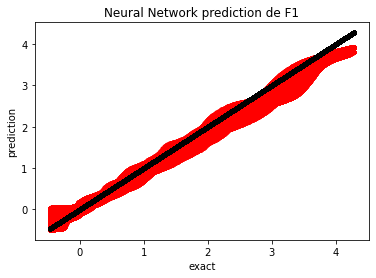

Model Performance
Correlation: 0.9973.
R2: 0.9944.


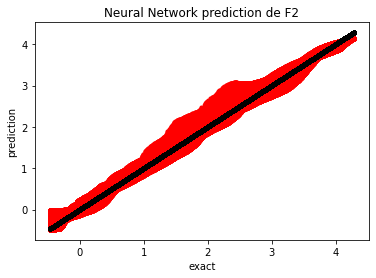

Model Performance
Correlation: 0.9973.
R2: 0.9944.


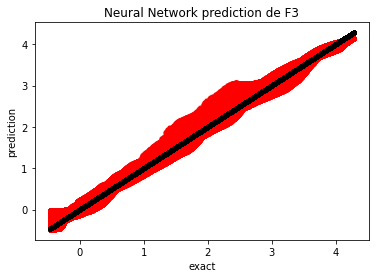

Model Performance
Correlation: 0.9977.
R2: 0.9896.


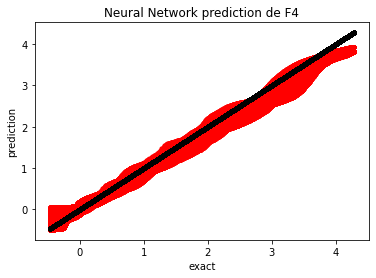

In [42]:
visualize1_model2()
visualize2_model2()
visualize3_model2()
visualize4_model2()

In [45]:
#%load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 3056), started 11 days, 5:30:32 ago. (Use '!kill 3056' to kill it.)

In [47]:
%tensorboard --logdir {logs_base_dir}  --host localhost

Reusing TensorBoard on port 6006 (pid 13800), started 0:01:23 ago. (Use '!kill 13800' to kill it.)